> SAÉ 2.04 - Exploitation d'une base de données  
> Auteurs : LEFRANCOIS Thibaut & DEMOUGE Colin  
> Date : 05/05/2023  
---
## Notebook 2 : Classement des départements les plus récurrent

#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Connexion à la base de données

In [2]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Requête SQL qui retourne les 10 départements dont les clients sont le plus souvent originaires, en utilisant la table CLIENT et la table COMMUNE pour extraire le code postal et le département correspondant. 

In [3]:
query = """
        SELECT CODE_COMMUNE "Departement", 
        COUNT(*) "Nombre Clients"
        FROM ADRESSE A
        JOIN COMMUNE CO ON A.COMMUNE = CO.ID_COMMUNE
        GROUP BY CODE_COMMUNE
        ORDER BY COUNT(*) DESC
        """

Cette requête utilise la fonction `SUBSTR` pour extraire les 2 premiers caractères du code postal, qui correspondent au département. La requête joint les tables `CLIENT`, `ADRESSE` et `COMMUNE`, et groupe les résultats par département en utilisant la fonction `GROUP BY`. 

Enfin, les résultats sont triés par nombre de clients descendant en utilisant l'expression `ORDER BY`, et la variable `v_departement_number` permet de savoir le nombre de départements que nous voulons dans notre classement.

Ce nombre de département est ensuite utilisé avec la fonction `FETCH FIRTS` qui limite le nombre de résultat de la requête SQL.

### Exécution de la requête

In [4]:
vcursor = cx_Oracle.Cursor(vconnect)
vcursor.execute(query)

<cx_Oracle.Cursor on <cx_Oracle.Connection to cdemouge@193.48.38.244:80/SAE204>>

#### Dictionnaire des colonnes de la relation résultat de la requête
##### Attribut `description` de la classe `cx_Oracle.Cursor`

In [5]:
columns_info = vcursor.description
for col in columns_info:
    print(col)

('Departement', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 20, 80, None, None, 0)
('Nombre Clients', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, None, None, 1)


Récupération des données dans deux listes

In [6]:
data = vcursor.fetchall()
#print(data)

In [7]:
departements = {}

for tuile in data:
    code_commune = tuile[0]
    nombre_clients = tuile[1]
    if len(code_commune)==4:
        code_departement = code_commune[0]
    else:
        code_departement = code_commune[:2]
    if code_departement not in departements:
        departements[code_departement] = 0
    departements[code_departement] += nombre_clients

departements_tries = list(departements.items())
departements_tries.sort(key=lambda x: x[1], reverse=True)

x_data = []
y_data = []

for code_departement, nombre_clients in departements_tries:
    x_data.append(code_departement)
    y_data.append(nombre_clients)

#for i in range(len(x_data)):
#    print(x_data[i], " ", y_data[i])

### Visualisation des donées

Installation (si nécéssaire) puis importation de la librairie `matplotlib` pour visualiser les données sous forme de diagrammes et de la librairie `numpy`dont on se sert ici pour la palette de couleur.

In [8]:
!pip install matplotlib
import matplotlib.pyplot as plot

!pip install numpy
import numpy as np

Création du diagramme et modification des paramètres

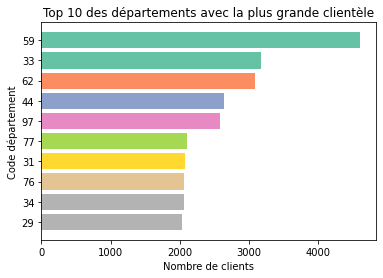

In [9]:
nb_departements = 10

# Récupérer les nb_departements départements ayant le plus de clients
top_departements = x_data[:nb_departements]
top_clients = y_data[:nb_departements]

# Définir une palette de couleurs pour les bâtons
couleurs = plot.cm.Set2(np.linspace(0, 1, nb_departements))

# Créer le diagramme bâton avec axes inversés
fig, ax = plot.subplots()
ax.barh(top_departements, top_clients, color=couleurs)

# Inverser les axes et les labels
ax.invert_yaxis()
ax.set_xlabel("Nombre de clients")
ax.set_ylabel("Code département")
ax.set_title(f"Top {nb_departements} des départements avec la plus grande clientèle")

plot.show()

### Analyse 

Ici, on remarque que le département 59 est largement au dessus des autres avec plus de 4000 clients. Viennent ensuite les département 33? et 62 qui ont plus de 3000 client puis le reste du top 10 reste autour des 2000-2500 clients.

### Fin de l'exécution de la requête

In [10]:
vcursor.close()
vconnect.close()